# 如何使用 Python 绘制词云图
（回顾前面两期内容，精确指导）

# 依赖
- 词云图的库：wordcloud
- 中文分词的库：jieba

In [2]:
!pip install jieba wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
# 读取小说《孔乙己》
with open('孔乙己.txt', 'r', encoding='utf-8') as file:
    # 读取文件内容
    content = file.read()

# 打印文件内容前10个字符
print(content[0:10])

    鲁镇的酒店的


In [15]:
# jieba 分词
import jieba
words = jieba.cut(content,use_paddle=True)
str = ' '.join(list(words))
print(str)

        鲁镇 的 酒店 的 格局 ， 是 和 别处 不同 的 ： 都 是 当街 一个 曲尺形 的 大 柜台 ， 柜 里面 预备 着 热水 ， 可以 随时 温酒 。 做工 的 人 ， 傍午 傍晚 散 了 工 ， 每每 花 四文 铜钱 ， 买 一碗 酒 ， — — 这是 二十多年 前 的 事 ， 现在 每碗 要涨 到 十文 ， — — 靠 柜外 站 着 ， 热热 的 喝 了 休息 ； 倘肯 多花 一文 ， 便 可以 买 一碟 盐 煮 笋 ， 或者 茴香豆 ， 做 下酒 物 了 ， 如果 出 到 十几 文 ， 那 就 能 买 一样 荤菜 ， 但 这些 顾客 ， 多 是 短衣 帮 ， 大抵 没有 这样 阔绰 。 只有 穿 长衫 的 ， 才 踱 进 店面 隔壁 的 房子 里 ， 要 酒 要 菜 ， 慢慢 地 坐 喝 。 
 
 　 　 我 从 十二岁 起 ， 便 在 镇口 的 咸亨 酒店 里 当 伙计 ， 掌柜 说 ， 样子 太 傻 ， 怕 侍候 不了 长衫 主顾 ， 就 在 外面 做点事 罢 。 外面 的 短衣 主顾 ， 虽然 容易 说话 ， 但 唠唠叨叨 缠夹不清 的 也 很 不少 。 他们 往往 要 亲眼 看着 黄酒 从 坛子 里 舀出 ， 看过 壶子 底里 有水 没有 ， 又 亲 看 将 壶子 放在 热水 里 ， 然后 放心 ： 在 这 严重 兼督下 ， 羼 水 也 很 为难 。 所以 过 了 几天 ， 掌柜 又 说 我 干不了 这 事 。 幸亏 荐头 的 情面 大 ， 辞退 不得 ， 便 改为 专管 温酒 的 一种 无聊 职务 了 。 
 
 　 　 我 从此 便 整天 的 站 在 柜台 里 ， 专管 我 的 职务 。 虽然 没有 什么 失职 ， 但 总 觉得 有些 单调 ， 有些 无聊 。 掌柜 是 一副 凶 脸孔 ， 主顾 也 没有 好 声气 ， 教 人 活泼 不得 ； 只有 孔乙己 到 店 ， 才 可以 笑 几声 ， 所以 至今 还 记得 。 
 
 　 　 孔乙己 是 站 着 喝酒 而 穿 长衫 的 唯一 的 人 。 他 身材 很 高大 ； 青白 脸色 ， 皱纹 间 时常 夹些 伤痕 ； 一部 乱蓬蓬 的 花白 的 胡子 。 穿 的 虽然 是 长衫 ， 可是 又 脏 又 破 ， 似乎 十多年 没有 补 ， 也 没有 洗 。 他 对 人 说话 ， 总是

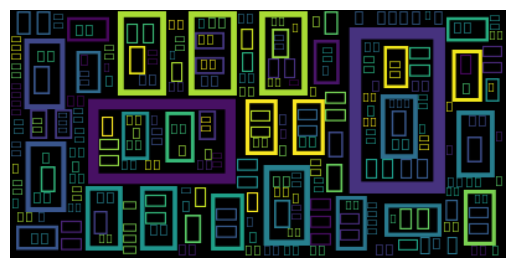

In [21]:
# 构建词云失败原因：没有引入中文字体库
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud().generate(str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

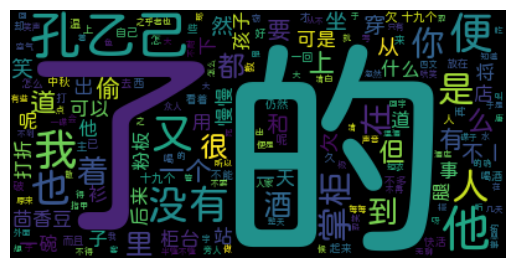

In [25]:
# 正确姿势：引入字体
# 字体来源：https://justfont.com/huninn/
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(font_path='jf-openhuninn-2.0.ttf').generate(str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

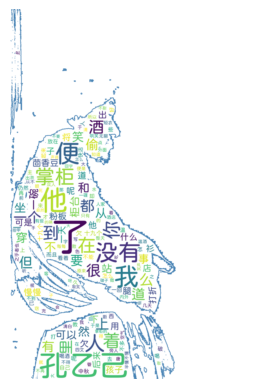

In [66]:
# 修改词云图形状
# 正确姿势：任意图片就可以了吗？
# 不，你还需要学会怎么将图片二值化
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def print_wordcloud(str):
    color_image =Image.open("孔乙己.jpg")
    gray_image = color_image.convert("L")
    # 将灰度图像转换为二值图像
    threshold = 15  # 设置二值化的阈值
    binary_image = gray_image.point(lambda x: 0 if x > threshold else 255)
    kyg_mask = np.array(binary_image)
    stopwords = ["是", "也", "又", "的"]
    wc = WordCloud(background_color="white", 
                   max_words=200, mask=kyg_mask,
                   stopwords=stopwords, 
                   contour_width=3, 
                   contour_color='steelblue',
                   font_path='jf-openhuninn-2.0.ttf')
    wc.generate(str)
    wc.to_file("孔乙己词云.png")
    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
print_wordcloud(str)

In [67]:
# 除了停止词，你也可以使用 jieba 按照词性过滤一下词汇
import jieba.posseg as pseg
words = pseg.cut(content, use_paddle=True) # 使用paddle模式
arr = []
for word, flag in words:
    if flag in ('a', 'n', 'v'):
        arr.append(word)
print(arr)

['酒店', '格局', '是', '不同', '是', '曲尺形', '大', '柜台', '柜', '预备', '热水', '温酒', '做工', '人', '散', '工', '花', '铜钱', '买', '酒', '是', '事', '每碗', '要', '涨到', '靠', '站', '热热', '休息', '花', '买', '一碟', '盐', '煮', '笋', '茴香豆', '做', '下酒', '出', '到', '文', '能', '买', '荤菜', '是', '短衣', '帮', '没有', '阔绰', '长衫', '踱', '进', '店面', '房子', '要', '酒', '要', '菜', '坐', '起', '酒店', '伙计', '掌柜', '说', '样子', '傻', '怕', '侍候', '不了', '长衫', '主顾', '做点事', '罢', '短衣', '主顾', '容易', '说话', '要', '看着', '黄酒', '坛子', '舀出', '看过', '壶子', '有', '水', '没有', '亲', '看', '放在', '热水', '放心', '严重', '兼', '水', '为难', '掌柜', '说', '事', '头', '情面', '大', '辞退', '不得', '改为', '专管', '温酒', '无聊', '职务', '站', '柜台', '专管', '职务', '没有', '失职', '总', '觉得', '单调', '无聊', '掌柜', '是', '脸孔', '主顾', '没有', '好', '声气', '教', '人', '活泼', '不得', '到', '店', '笑', '记得', '是', '站', '喝酒', '穿', '长衫', '人', '身材', '高大', '青白', '脸色', '皱纹', '夹', '伤痕', '穿', '是', '长衫', '脏', '破', '没有', '补', '没有', '洗', '人', '说话', '教', '人', '姓', '描红', '纸', '大人', '取下', '绰号', '叫作', '到', '店', '喝酒', '人', '看着', '笑', '有', '叫道', '添', '新', '伤疤', '回答', '说', 

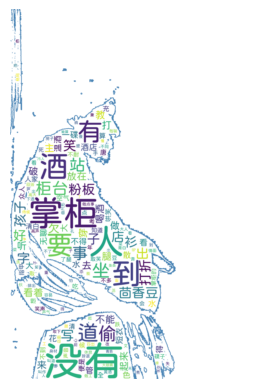

In [68]:
print_wordcloud(' '.join(arr))